In [1]:
import numpy as np
np.set_printoptions(precision=4, suppress=True, threshold=1000)
import matplotlib.pyplot as plt

from library.basic_functions import truncate_to_decimal_places

In [2]:
t, N, var = np.loadtxt("assets/endsemfit.txt").T
t.shape, N.shape, var.shape

((10,), (10,), (10,))

<ErrorbarContainer object of 3 artists>

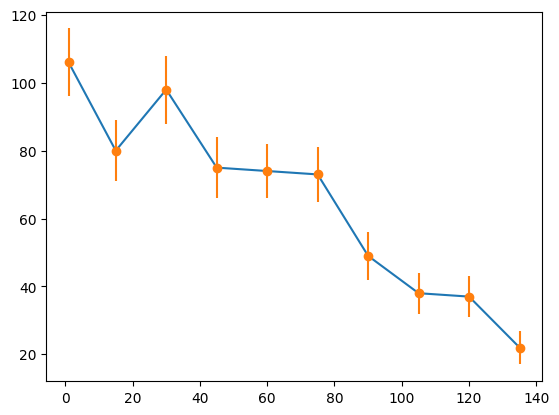

In [3]:
# plot t with N and var
plt.plot(t, N, label='data')
plt.errorbar(t, N, yerr=var, fmt='o', label='data')

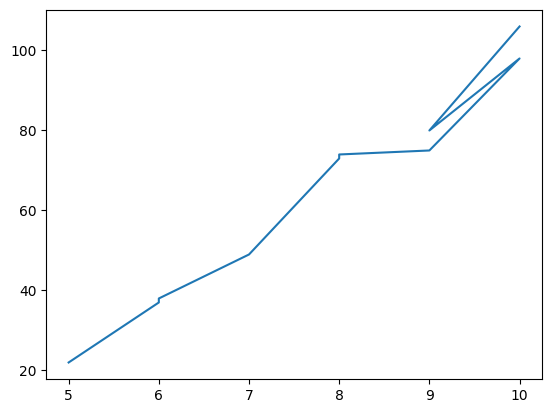

In [4]:
plt.plot(var, N)

# Q2

In [5]:
from library.nonlinear_equations import fixed_point_iteration

Given Equation is:

Vanderwals equation
$$
\left(P + \frac{a}{V^2}\right)(V - b) = RT
$$

where 
- $P = 5.95 atm$
- $a = 6.254$
- $b = 0.05422$
- $R = 0.0821$
- $T = 300 K$

And we have to find the volume of the gas. Now we are supposed to solve this using fixed point iteration method. That needs us to rewrite the equation in the form of $x = \phi(x)$.

So, in 1 way we can rewrite the equation as:

$$
V = \frac{RT}{P + \frac{a}{V^2}} + b
$$

where 
$$
\phi(V) = \frac{RT}{P + \frac{a}{V^2}} + b
$$

And in the other way we can rewrite the equation as:

$$
V = \sqrt{\frac{a(V-b)}{RT-P(V-b)}}
$$

where

$$
\phi(V) = \sqrt{\frac{a(V-b)}{RT-P(V-b)}}
$$

In [6]:
P = 5.95
a = 6.254
b = 0.05422
R = 0.0821
T = 300

# \phi(V) = \frac{RT}{P + \frac{a}{V^2}} + b
phi1 = lambda V: R*T/(P + a/V**2) + b

# \phi(V) = \sqrt{\frac{a(V-b)}{RT-P(V-b)}}
phi2 = lambda V: np.sqrt(a*(V-b)/(R*T - P*(V-b)))

In [7]:
ans1 = fixed_point_iteration(phi1, 0.1, max_it=100, tolerance=1e-5)
truncate_to_decimal_places(ans1, 5)

0.07811

In [8]:
ans2 = fixed_point_iteration(phi2, 1, max_it=100, tolerance=1e-5)
truncate_to_decimal_places(ans2, 5)

0.18568

# Q3
done in copy

# Q4
done in copy

# Q5

In [9]:
from library.eigen import power_method_n
mat = np.loadtxt('assets/endsemmat.txt')
mat

array([[ 2., -1.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.],
       [ 0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0., -1.,  2.]])

In [10]:
l, v = power_method_n(mat, 2)
print(l)
print(v)

[3.7321 3.    ]
[[ 0.2887 -0.5     0.5774 -0.5     0.2887]
 [-0.5     0.5    -0.     -0.5     0.5   ]]


In [11]:
a = c = -1
b = 2
n = 5
k = np.arange(1, 5+1).reshape(1, -1)
i = np.arange(1, 2+1).reshape(-1, 1)

In [12]:
proposed = b + 2*np.sqrt(a*c)*np.cos(k*np.pi/(n+1))
np.allclose(proposed[0, :2], l)

True

In [13]:
proposed = 2*(c/a)**(k/2)*np.sin(i@k*np.pi/(n+1))
np.allclose(proposed, v)

False

# Q6

Acceptance rate: 70.93%


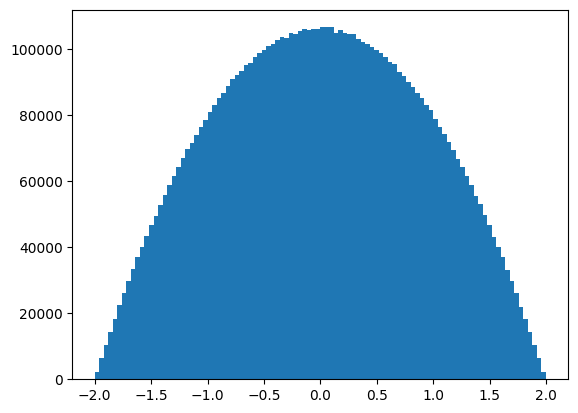

In [14]:
N = int(1e7)
a = 2
g_sigma = 1.5  # standard deviation of g(x) distribution
f = lambda x: 0.5 * (a**2 - x**2)
g = lambda x: np.exp(-x**2/(2*g_sigma**2)) * 0.5 * a**2
# 0.5a^2 is the scaling factor to make g(x) more than f(x) for all x

np.random.seed(21)
u = np.random.randn(N)*g_sigma
p = np.random.rand(N)

x = u[p < f(u)/g(u)]  # accept / reject

n = len(x)  # count accepted samples

print(f"Acceptance rate: {n*100/N:.2f}%")

a = plt.hist(x, bins=100, label='Generated samples')

# Q7

let us now write a function which generates random numbers from the given distribution following answer of Q6.

In [15]:
def get_rng(a, N=int(1e6), seed=21):
    f = lambda x: 0.5 * (a**2 - x**2)
    g = lambda x: np.exp(-x**2/(2*a**2)) * 0.5 * a**2

    np.random.seed(seed)
    u = np.random.randn(N)*a
    p = np.random.rand(N)

    return u[p < f(u)/g(u)]

Text(0, 0.5, 'integral')

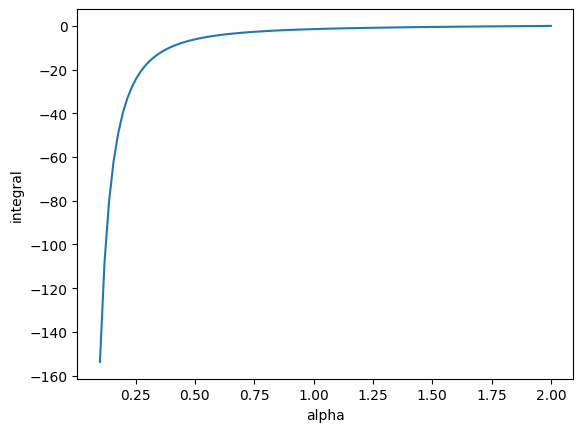

In [34]:
# variational method
sigma = 0.5
mu = 0
num_samples = int(1e5)

alphas = np.linspace(0.1, 2, 100)
ys = np.zeros_like(alphas)
for i, alpha in enumerate(alphas):
    rands = get_rng(alpha, num_samples)
    eps = lambda x: 0.5*x**2 - 1/(alpha**2-x**2)
    integral = np.mean(eps(rands))
    ys[i] = integral

plt.plot(alphas, ys)
plt.xlabel('alpha') 
plt.ylabel('integral')